In [1]:
import pandas as pd
import numpy as np

# 문제 정의

실제로 타이타닉에 탔던 승객들의 데이터를 이용하여 승객들의 특징에 따른 생존률을 구해본다.

# 데이터 정의

### 데이터 설명
**survival** : Survival [0 = No, 1 = Yes]

**pclass** :	Ticket class	[1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)]

**sex** :	Sex	

**Age** :	Age in years	

**sibsp** :	# of siblings / spouses aboard the Titanic	

**parch** :	# of parents / children aboard the Titanic	

**ticket** :	Ticket number	

**fare** :	Passenger fare	

**cabin** :	Cabin number	

**embarked** :	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
train_f = pd.read_csv("../data/train.csv")
test_f = pd.read_csv("../data/test.csv")
test_a =pd.read_csv("../data/gender_submission.csv")

In [3]:
train_f.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_f.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_a.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
test_td = pd.concat([test_f, test_a], axis=1)
test_td = test_td.iloc[:,[0,12,1,2,3,4,5,6,7,8,9,10]]
titanic_df = pd.concat([train_f, test_td], axis=0)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.to_csv("../data/titanic_df.csv")

In [8]:
titanic_df = pd.read_csv("../data/titanic_df.csv")

In [9]:
# 현재 가지고 있는 데이터의 요약정보를 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Unnamed: 0     1309 non-null int64
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 133.0+ KB


# 데이터 전처리

실제로 사고가 당시 여성과 노약자를 먼저 구명보트에 태웠었다는 정보가 있다.
이러한 정보들을 기준으로 생존자예측에 큰 영향을 끼치지 않을 만한 특징(feature)을 데이터에서 제거합니다. 
요소와 null값이 너무 많은 데이터를 삭제하고 여성을 0 남성을 1로 변환한다.

In [10]:
del titanic_df["Name"]
del titanic_df["Ticket"]
del titanic_df["Cabin"]
del titanic_df["Embarked"]
del titanic_df["Unnamed: 0"]

In [11]:
titanic_df.loc[titanic_df["Sex"] == "female",["Sex"]] = 0
titanic_df.loc[titanic_df["Sex"] == "male",["Sex"]] = 1
titanic_df = titanic_df.dropna()

In [12]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [13]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,654.990431,0.399043,2.206699,0.628708,29.851837,0.503349,0.421053,36.686080
std,377.650551,0.489936,0.841542,0.483382,14.389194,0.912471,0.840052,55.732533
min,1.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,326.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000
50%,662.000000,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.750000
75%,973.000000,1.000000,3.000000,1.000000,39.000000,1.000000,1.000000,35.500000
max,1307.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


* titanic_df의 요약내용을 보면 생존률은 37.7%정도로 매우 낮다는 것을 알 수 있다.
* 성별도 여성보다는 남성의 수 가 더 많다는 것을 알 수 있고, 평균 연령대도 30세로 생각보다 낮았다.

# 데이터 시각화

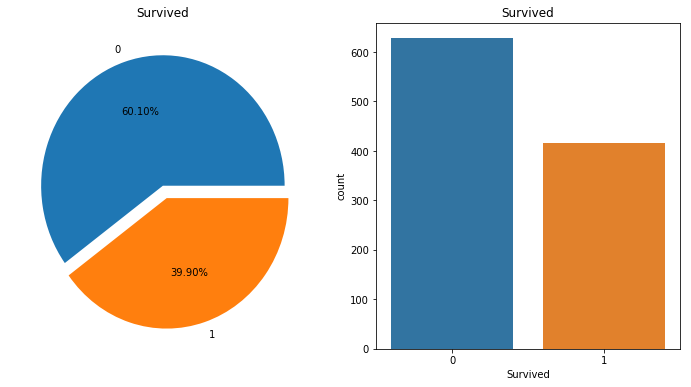

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f,ax=plt.subplots(1,2,figsize=(12,6))

titanic_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=titanic_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

* 파란색이 사망자, 주황색이 생존자를 나타낸다.

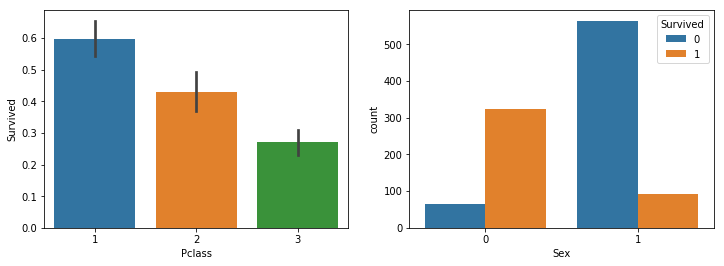

In [16]:
plt.figure(figsize=[12,4])
plt.subplot(121)
sns.barplot('Pclass', 'Survived', data=titanic_df)
plt.subplot(122)
sns.countplot('Sex',hue='Survived',data=titanic_df)
plt.show()

* 좌석등급별 생존률을 비교해보면 **등급이 높은(비싼)자리일 수록 생존률이 높은 것**을 알 수 있다. 

* 오른쪽 그래프를 살펴보면 **왼쪽부터 여성사망자, 여성생존자, 남성사망자, 남성생존자**를 나타낸다. **여성탑승자의 생존률이 남성탑승자보다 훨씬 높은 것**을 알 수 있다.

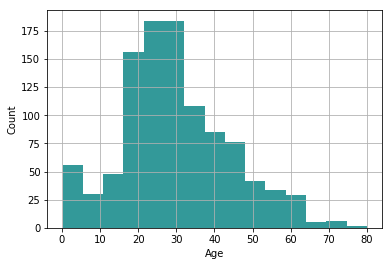

In [15]:
ax = titanic_df["Age"].hist(bins=15, color='teal', alpha=0.8)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

* 탑승자의 연령분포를 살펴보면 **20대~30대**에 밀집 되어 있는 것을 알 수 있다.

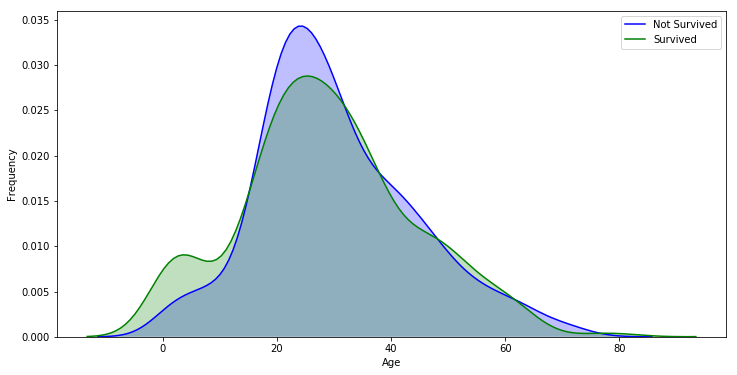

In [17]:
f,ax = plt.subplots(figsize=(12,6))
g = sns.kdeplot(titanic_df["Age"][(titanic_df["Survived"] == 0) & (titanic_df["Age"].notnull())], 
                ax = ax, color="Blue", shade = True)
g = sns.kdeplot(titanic_df["Age"][(titanic_df["Survived"] == 1) & (titanic_df["Age"].notnull())], 
                ax =g, color="Green", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

* 생존률과 나이를 비교한 이 그래프에서 가장 중요한 부분은 **생존자의 비율이 높은 연령대를 나타내는 연두색부분**과 **사망자의 비율이 높은 연령대를 나타내는 보라색부분**이다.

* **0세~10대후반까지는 다른 나이대에 비해 생존률이 매우 높게** 나오는 반면 **10대후반~30대중반까지는 다른 나이대에 비해 생존률이 매우 낮게** 나온다.

#### 전반적인 데이터를 분석해 보면 여성이고, 나이가 어리며, 비싼등급의 좌석에 앉아 있을 수록 생존률이 높다는 것을 알 수 있다. 좌석등급을 제외하면 사고가난 급박한 상황속에서도 약자를 먼저 보호하려 했던 그 당시 사람들의 배려심과 용기가 대단한 것 같다.

# 데이터 분할

In [18]:
# sklearn의 train_test_split을 사용하면 라인 한줄로 손쉽게 데이터를 나눌 수 있다
from sklearn.model_selection import train_test_split

# 다듬어진 데이터에서 20%를 테스트 데이터로 분류합니다
train, test = train_test_split(titanic_df, test_size=0.2)

In [19]:
import pickle
with open('../data/fifa_train.pkl', 'wb') as train_df:
    pickle.dump(train, train_df)
    
with open('../data/fifa_test.pkl', 'wb') as test_df:
    pickle.dump(test, test_df)

In [20]:
with open('../data/fifa_train.pkl', 'rb') as train_df:
    train = pickle.load(train_df)
    
with open('../data/fifa_test.pkl', 'rb') as test_df:
    test = pickle.load(test_df)

# 모델의 최적 파라미터 설정

**max_depth** : 트리의 최대 한도 깊이  
**min_samples_split** : 자식 노드를 갖기 위한 최소한의 데이터 갯수  
**mins_samples_leaf** : 맨 마지막 끝 노드의 최소 데이터 갯수  
**random_state** : 여러번 실행해도, 파라미터가 같을 경우, 결과가 항상 같게 만들어주는 파라미터 

In [21]:
from sklearn import tree
from sklearn import preprocessing

In [62]:
X_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y_train = train[['Survived']]

X_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y_test = test[['Survived']]

In [63]:
depth = list(range(1,100,5))
sample_split = list(range(2,100,5))
sample_leaf = list(range(2,100,5))
random_state = list(range(1,100,5))
clf_list = []
for i in depth:
    for j in sample_split:
        for k in sample_leaf:
            for l in random_state:
                clf_list.append(tree.DecisionTreeClassifier(max_depth=i, 
                                  min_samples_split=j,
                                  min_samples_leaf=k, 
                                  random_state=l).fit(X_train, y_train))

In [76]:
clf_list[-5:]

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=96,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=97, min_samples_split=97,
             min_weight_fraction_leaf=0.0, presort=False, random_state=76,
             splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=96,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=97, min_samples_split=97,
             min_weight_fraction_leaf=0.0, presort=False, random_state=81,
             splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=96,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=97, min_samples_split=97,
             min_weight_fraction_leaf=0.0

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score_list = {}
for clf in clf_list:
    pred = clf.predict(X_test)
    accuracy_score_list[clf] = accuracy_score(y_test, pred)

위에서 구한 수 많은 clf값중에 가장 높은 정확도를 나타내는 값으로 최적의 clf를 구한다.

In [73]:
max_accuracy = max(list(accuracy_score_list.values()))
best_clf = list(accuracy_score_list.keys())[list(accuracy_score_list.values()).index(max_accuracy)]
best_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=37,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

# 테스트
모델을 테스트합니다.

In [74]:
pred = best_clf.predict(X_test)

모델 예측 정확도(accuracy)를 확인합니다.

In [75]:
print("accuracy : " + str( accuracy_score(y_test, pred)) )

accuracy : 0.8755980861244019


실제값과 예측값을 비교합니다.

In [69]:
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test["Survived"]}) 
comparison

,prediction,ground_truth
382,0,0
0,0,0
829,1,1
892,1,1
152,0,0
1206,1,1
1047,1,1
608,1,1
433,0,0
243,0,0


# 의사결정트리 시각화

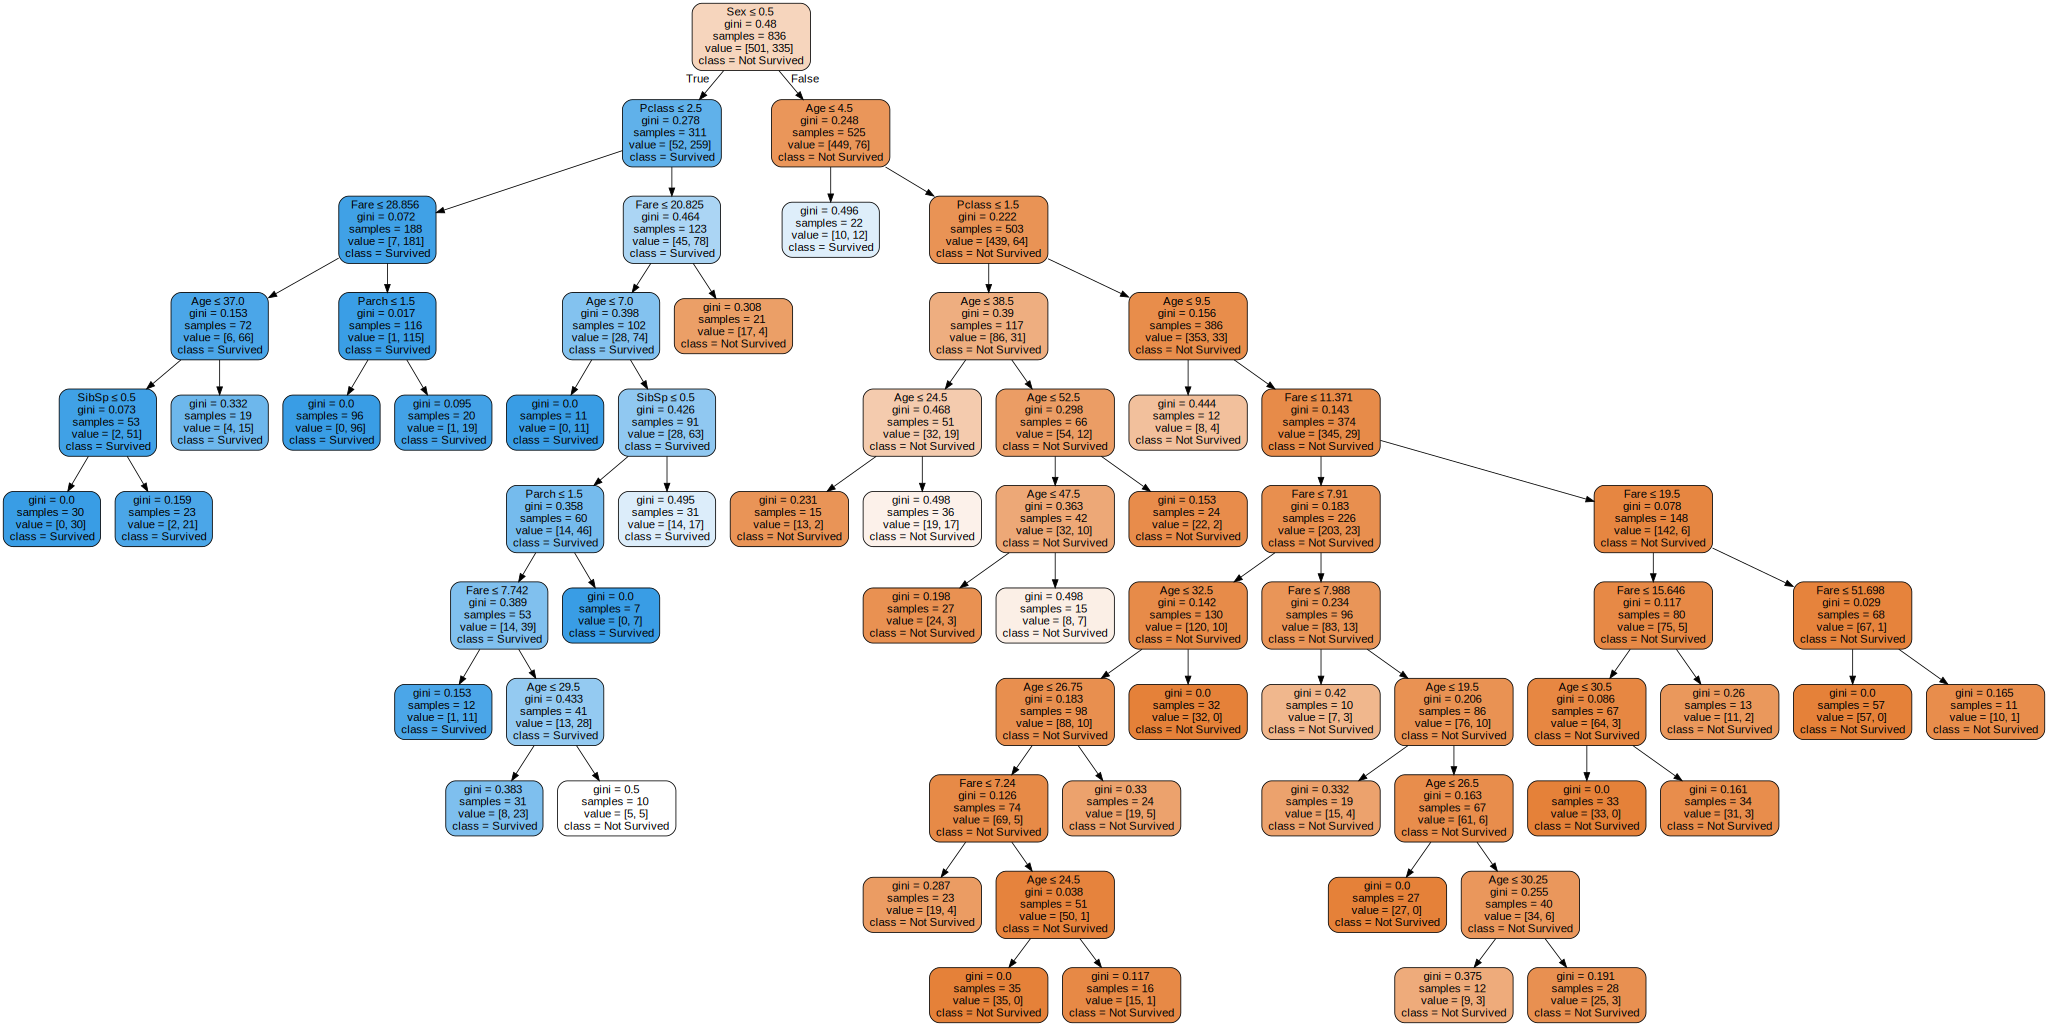

In [72]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz
dot_data = tree.export_graphviz(best_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("titanic survived")

dot_data = tree.export_graphviz(best_clf, out_file=None, 
                         feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'],  
                         class_names=['Not Survived', 'Survived'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

**gini** : 불순도 척도. 0일 경우, 모든 샘플이 하나의 분류값을 갖으며, 0이 아닐 경우, 1에 가까울수록, 여러 분류값이 한 노드에 존재합니다.  
**samples** : 노드 안에 들어 있는 데이터의 갯수  
**value** : 분류값 별 데이터의 갯수   
**class** :  분류값